# Detecção de Fraudes em Cartões de Crédito

Neste projeto, abordamos o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento. Para isso, utilizamos alguns métodos, tais como: **Regressão Logística,  SVC, KNN e Arvore de Decisão.**

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

###Importando as bibliotecas necessárias:

In [0]:
# Instalando o Scikit:
!pip install -q scikit-plot --quiet

# Retirando possíveis mensagens de avisos:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [0]:
# Importando as bibliotecas essenciais:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando o scikitplot:
import scikitplot as skplt

###Importando o Dataset:

Para facilitar a aquisição dos dados, o professor disponibilizou um link com o  acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [0]:
# Obtendo o link para o Dataset:
data_path = 'https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1'

# Criando o DataFrame com a leitura do Dataset através do Pandas:
df = pd.read_csv(data_path)

##Análise Exploratória:

A Análise Exploratória é composta por técnicas simples que buscam extrair ou ilustrar as informações contidas nos dados, sem conter nenhuma alteração significativa.

Com essa definição, utilizaremos da Visualização de Dados para aumentar a eficiência dessa exploração inicial.

###Q1. Como esse Dataset está organizado?

Esses primeiros passos são essenciais para começarmos a entender como que o nosso Dataset está estruturado. Para isso imprimimos os primeiros 5 termos utilizando "`.head()`"

In [0]:
# Imprimindo as primeiras 5 linhas do DataFrame:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Q2. Como está a distribuição dos dados nesse DataFrame?

Agora precisamos ver o comportamento das nossas variáveis, o quanto elas variam em suas distribuições. Para isso podemos utilizar a função ".describe()" que nos retorna:

* `count` - Quantidade de valores contados;
* `mean` - A média aritmética;
* `std` - O Desvio Padrão (Standard Deviation);
* `min`- Valor Mínimo;
* `25%` - Primeiro quartil (os 25% menores valores);
* `50%` - Segundo quartil ou mediana (os 50% menores valores);
* `75%` - Terceiro quartil (os 75% menores valores);
* `max` - Valor Máximo.

In [0]:
# Imprimindo as informações sobre as distribuições:
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


###Q3. Há dados Ausentes no Dataframe?
Outro fator que nos devemos sempre atentar é sobre a quantidade de valores faltantes ou a presença de variáveis nulas. Para essa verificação utilizamos a função ".isnull()" para retornar um valor Verdadeiro (`True` ou 1) para entradas nulas ou Falso (`False` ou 0) para variáveis que possuem valor.

No final disso, somamos todos os valores e dividimos pelo tamanho do Dataset. Assim, **obtemos a porcentagem de valores nulos existentes.**

In [0]:
#Verificando a quantidade de dados nulos:
df.isnull().sum().max()

0

###Q4. Qual a quantidade de Compras Fraudulentas?

Afinal, para entendermos melhor a nossa classificação, precisamos entender qual é essa proporção de compras fraudulentas e compras normais. Para isso, utilizaremos o gráfico de pizza:

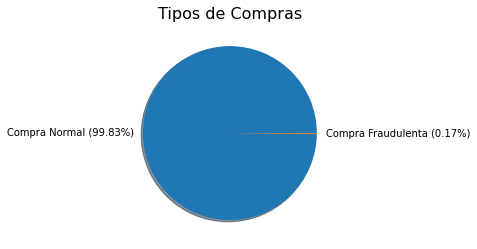

In [0]:
# Colocando as legendas no gráfico:
labels = ["Compra Normal ({:.2f}%)".format(df.Class.value_counts()[0]/df.shape[0]*100),
          "Compra Fraudulenta ({:.2f}%)".format(df.Class.value_counts()[1]/df.shape[0]*100)]

# Plotando o gráfico do tipo de pizza:
plt.pie(df.Class.value_counts(), labels = labels, shadow=True)

# Colocando o Título:
plt.title("Tipos de Compras", fontsize = 16)

plt.show();

### Q5. Qual o Histórico de Compras ao decorrer do Tempo?

Para sanar essa duvida utilizaremos o gráfico do tipo Histograma para determinar quando aconteceu as fraudes, para que assim possamos entender se há uma relação das compras fraudulentas com o tempo.

Utilizamos a variável `Time` para obtemos o gráfico de Histograma.

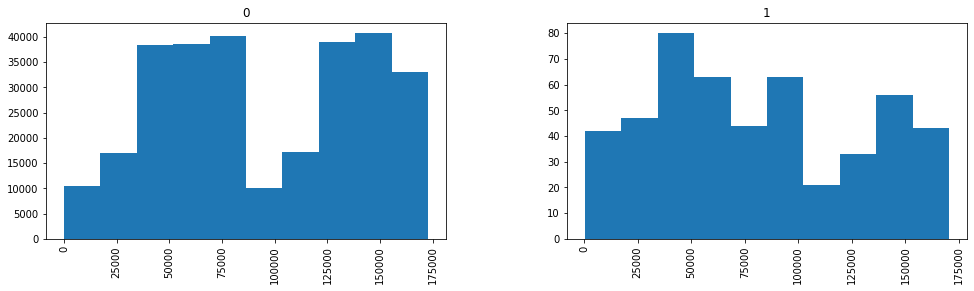

In [0]:
# Imprimindo o gráfico do tipo Histograma:
df.Time.hist(by=df.Class, figsize = (16,4));

###Q6. Quanto é gasto em cada tipo de compra?

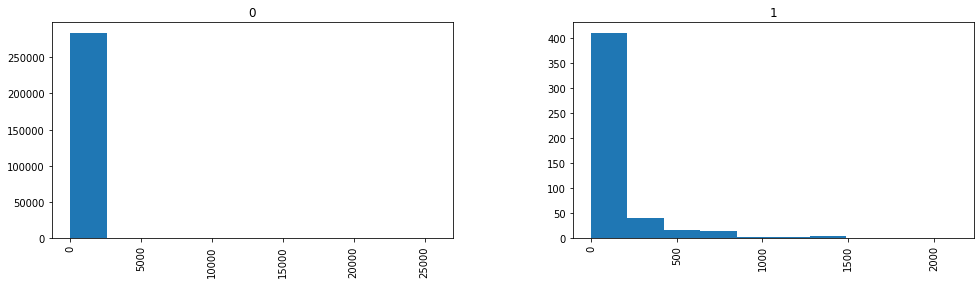

In [0]:
# Imprimindo o gráfico do tipo Histograma:
df.Amount.hist(by=df.Class, figsize = (16,4));

###Q7. Qual é o Boxplot de `Amount`?

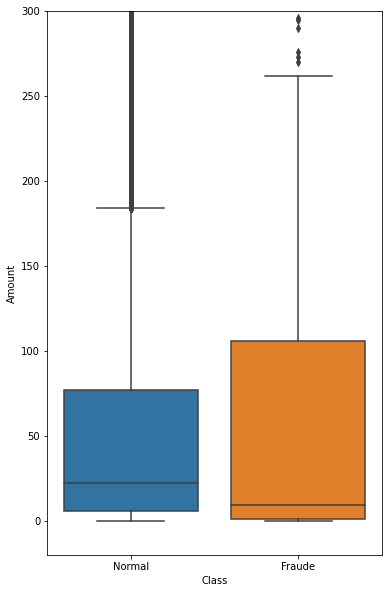

In [0]:
# Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (6,10), sharex = True)

# Imprimindo o gráfico do tipo boxplot:
sns.boxplot(df.Class, df.Amount)

# Colocando um limite de exibição entre -20 e 300:
plt.ylim(-20, 300)

# Inserindo a legenda:
plt.xticks([0,1], ["Normal", "Fraude"]);

## Prevendo Compras Fraudulentas:

Como dito anteriormente, as compras frauduluentas são responsáveis por um montante elevado de capital disperdiçado, para isso, buscaremos criar um modelo que seja capaz de prever esse tipo de compra.

Primeiramente, criaremos nossas variáveis independentes X e a nossa classe y como Normal (0) ou Fraudulenta (1).

In [0]:
# Importando a biblioteca para separar X e y em Treino e teste:
from sklearn.model_selection import train_test_split

# Criando X e y:
X = df.drop("Class", axis = 1)
y = df.Class

# Separando-os em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle = True)

In [0]:
# Importando a bilioteca para aplicar Regressão Logistica e Acurácia:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Criando o modelo de Regressão Logistica
LogReg = LogisticRegression(max_iter = X.shape[0])

# Treinando o Modelo:
LogReg.fit(X_train, y_train)

# Prevendo os valores de y para X_test:
y_pred = LogReg.predict(X_test)

# Imprimindo a Acurracia:
print("R² = {:.2f}".format(accuracy_score(y_test,y_pred)*100))

R² = 99.89


Um dos problemas esperados para nossa situação é que o nosso modelo seja capaz de prever corretamente compras normais, porém, as compras frauduluentas (que é o que precisamos combater), ele não sabe. Para visualizarmos essa premissa, iremos potar a Matriz de Confusão:

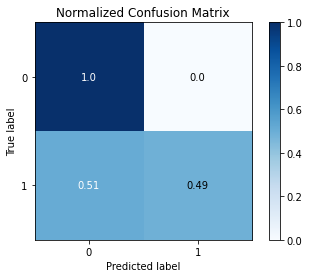

In [0]:
# Matriz de Confusão:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True);

Como dito anteriormente, o Modelo conseguiu acertar 100 % dos casos para compras normais, mas estamos buscando combater as compras fraudulentas, e obtemos apenas um acerto de 49% dos casos.

### Normalização do Dataset:

A finalidade de Normalizar um Dataset é que o nosso Modelo trabalhe com a mesma quantidade de dados de Compra e Fraude. Para isso, importamos a biblioteca "`imblearn.under_sampling`". E assim, criamos a variável `X_rus` e `y_rus`.

In [0]:
# Importando a biblioteca para Normalização:
from imblearn.under_sampling import RandomUnderSampler

# Criando o modelo de normalização:
rus = RandomUnderSampler()

# Criando as variáveis normalizadas:
X_rus, y_rus = rus.fit_sample(X_train, y_train)

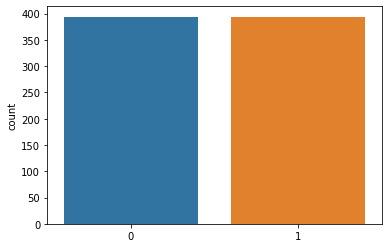

In [0]:
# Visualizando a quantidade de compras normais e fraudulentas de y_rus:
sns.countplot(y_rus);

### Correlação dos dados normalizados:

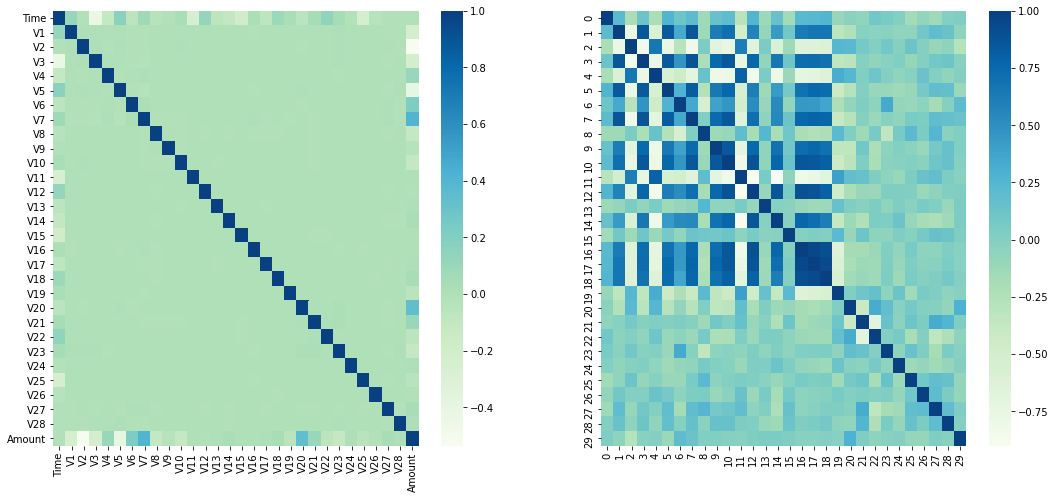

In [0]:
# Correlação antes dos dados normalizados:
corr = X_train.corr()

# Correlação depois da normalização:
corr_rus = pd.DataFrame(X_rus).corr()

# Criando a figura no Pyplot:
fig, ax = plt.subplots(1,2, figsize = (18,8))

# Imprimindo as duas matrizes de correlação:
sns.heatmap(corr, ax = ax[0], cmap = "GnBu")
sns.heatmap(corr_rus, ax=ax[1], cmap = "GnBu")

plt.show();

##Utilizando os principais algoritmos de classificação:

###Regressão Logística:

A Regressão Logística é uma variação da Regressão Linear com a implementação da principal objetivo era prever um valor numérico, a Regressão Logística prevê a probilidade de tal classe acontecer ao retornar valores binários (0 ou 1, sim ou não).

Para isso, é retornado a probabilidade de sucesso e fracasso. Em que classificamos a amostra de acordo com a maior probabilidade. Uma das formas de mensurar o resultado é pelo Odds ratio (ou Razão das Chances) que compara a chance de sucesso de um grupo sobre o outro:

$ \log(R) = logit(p_{1}) - logit(p_{2}) $

A fórmula para o calculo da Regressão Logística é:

$ p(x) = \cfrac{1}{1+e^{-(B_0 + B_1x)}} $

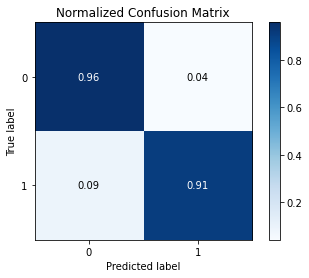

In [0]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_rus, y_rus)
y_pred = modelo.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True);

###Suport Vector Classifier:

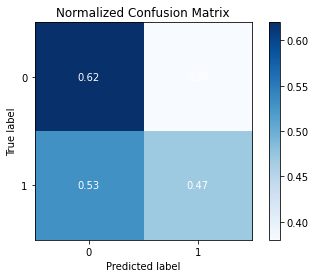

In [0]:
from sklearn.svm import SVC
modelo = SVC()
modelo.fit(X_rus, y_rus)
y_pred = modelo.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True);

###KNN Classifier:

O KNN (K neearest neighbors) é um tipo de algoritmo de aprendizado de máquina que classifica em binário (0 ou 1) as novas instâncias através dos "K"s vizinhos mais próximos que próximos que serão considerados. A ordem desses vizinhos são separadas através do menor valor obtido da Distância Euclidiana.

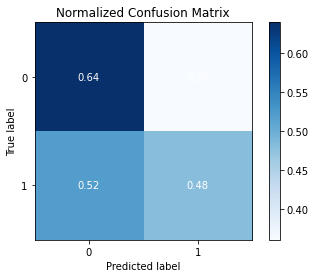

In [0]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=20)
modelo.fit(X_rus, y_rus)
y_pred = modelo.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True);

###Decision Tree Classifier:

A Arvore de Decisão é um modelo em que são criados nodos para determinar uma ação de acordo com a Instância inserida. Essas ações tomadas podem aumentar de acordo com a complexidade da árvore pode determinar quais serão os critérios de segmentação dos nodos.

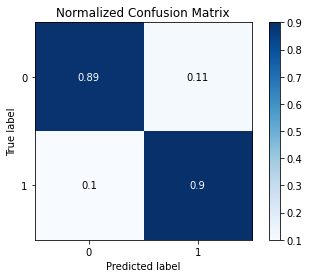

In [0]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(X_rus, y_rus)
y_pred = modelo.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True);

# Conclusões:

Apesar dos dados estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas, o desbalanceamento e a Transformação PCA demandaram um trabalho considerável.


Vimos que tanto a Regressão Logistica quanto a arvore de Decisão possuem um acerto elevado de compras fraudulentas. Porém, o melhor modelo é a Regressão Logistica, isso se deve ao baixo erro em compras normais (4%) quando comparado com a arvore de decisão (10%).

Nota-se que esse modelos de classificação possuem esses resultado devido aos dados presentes no Dataset e podem nao ter a mesma eficiência em outros Datasets e normalizações. Há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.